In [1]:
# Eksempler på vurdering av antagelser

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
# Generer datasett
nObs = 50
np.random.seed(2254)
xA = stats.uniform.rvs(size=nObs)*5
yA = 4 + 2*xA**2 + stats.norm.rvs(loc = 0, scale = 2, size = nObs)

xB = xA
yB = 4 + 2*xB + stats.norm.rvs(loc = 0, scale = 2, size = nObs)

xC = stats.uniform.rvs(size=nObs)*6-3
yC = 4 - xC**2 + stats.norm.rvs(loc = 0, scale = 2, size = nObs)

xD = np.linspace(0, 5, nObs)
yD = 4 + 2*xD + stats.norm.rvs(loc = 0, scale = 1, size = nObs)*np.linspace(0.1,3, nObs)

Text(0.5, 1.0, 'D')

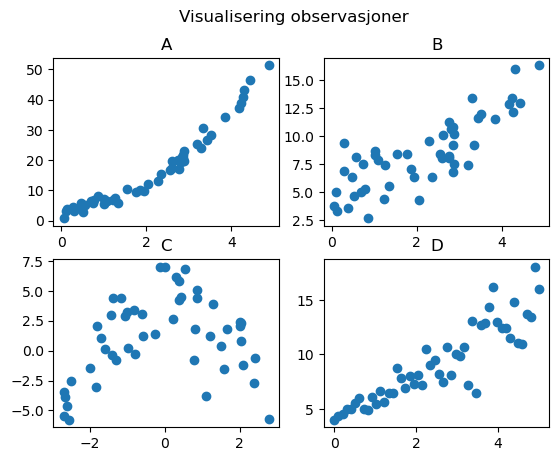

In [4]:
# Kryssplott av datapunkter
fig, axs = plt.subplots(2,2)
fig.suptitle('Visualisering observasjoner')
axs[0,0].plot(xA,yA, 'o')
axs[0,0].set_title("A")
axs[0,1].plot(xB,yB, 'o')
axs[0,1].set_title("B")
axs[1,0].plot(xC,yC, 'o')
axs[1,0].set_title("C")
axs[1,1].plot(xD,yD, 'o')
axs[1,1].set_title("D")

In [5]:
# Estimer for A
xBarA = np.mean(xA)
yBarA = np.mean(yA)
Sxx = np.sum((xA-xBarA)**2)
SxxA = Sxx
Sxy = np.sum((xA-xBarA)*(yA-yBarA))
bHatA = Sxy/Sxx
aHatA = yBarA-bHatA*xBarA

# Estimer for B
xBarB = np.mean(xB)
yBarB = np.mean(yB)
Sxx = np.sum((xB-xBarB)**2)
SxxB = Sxx
Sxy = np.sum((xB-xBarB)*(yB-yBarB))
bHatB = Sxy/Sxx
aHatB = yBarB-bHatB*xBarB

# Estimer for C
xBarC = np.mean(xC)
yBarC = np.mean(yC)
Sxx = np.sum((xC-xBarC)**2)
SxxC = Sxx
Sxy = np.sum((xC-xBarC)*(yC-yBarC))
bHatC = Sxy/Sxx
aHatC = yBarC-bHatC*xBarC

# Estimer for D
xBarD = np.mean(xD)
yBarD = np.mean(yD)
Sxx = np.sum((xD-xBarD)**2)
SxxD = Sxx
Sxy = np.sum((xD-xBarD)*(yD-yBarD))
bHatD = Sxy/Sxx
aHatD = yBarD-bHatD*xBarD

Text(0.5, 1.0, 'D')

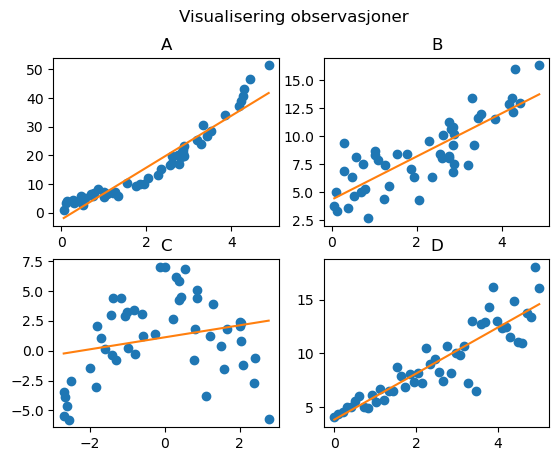

In [6]:
# Plot med regresjonslinjer
fig, axs = plt.subplots(2,2)
fig.suptitle('Visualisering observasjoner')
axs[0,0].plot(xA,yA, 'o')
xs = np.linspace(np.min(xA), np.max(xA), 100)
ys = aHatA+bHatA*xs
axs[0,0].plot(xs, ys)
axs[0,0].set_title("A")
axs[0,1].plot(xB,yB, 'o')
xs = np.linspace(np.min(xB), np.max(xB), 100)
ys = aHatB+bHatB*xs
axs[0,1].plot(xs, ys)
axs[0,1].set_title("B")
axs[1,0].plot(xC,yC, 'o')
xs = np.linspace(np.min(xC), np.max(xC), 100)
ys = aHatC+bHatC*xs
axs[1,0].plot(xs, ys)
axs[1,0].set_title("C")
axs[1,1].plot(xD,yD, 'o')
xs = np.linspace(np.min(xD), np.max(xD), 100)
ys = aHatD+bHatD*xs
axs[1,1].plot(xs, ys)
axs[1,1].set_title("D")

Text(0.5, 1.0, 'D')

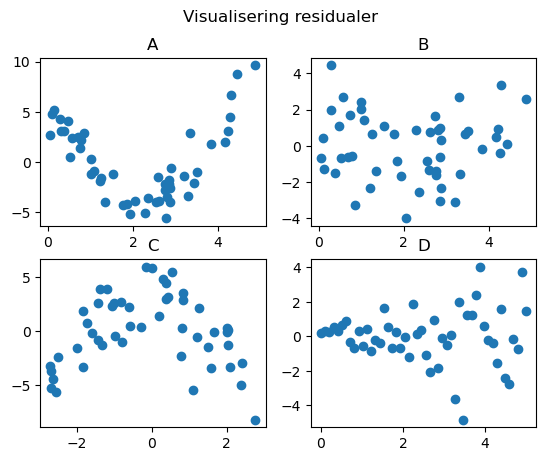

In [7]:
# Plot residualer
fig, axs = plt.subplots(2,2)
fig.suptitle('Visualisering residualer')
axs[0,0].plot(xA,yA-aHatA-bHatA*xA, 'o')
axs[0,0].set_title("A")
axs[0,1].plot(xB,yB-aHatB-bHatB*xB, 'o')
axs[0,1].set_title("B")
axs[1,0].plot(xC,yC-aHatC-bHatC*xC, 'o')
axs[1,0].set_title("C")
axs[1,1].plot(xD,yD-aHatD-bHatD*xD, 'o')
axs[1,1].set_title("D")

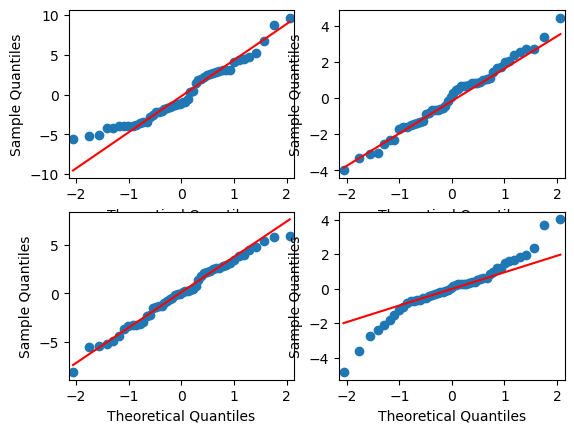

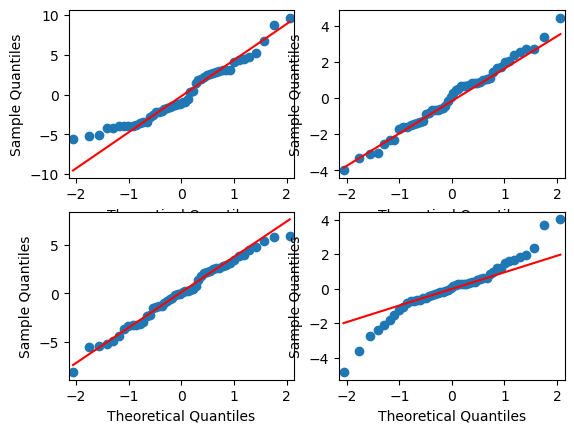

In [8]:
# Normalfordelingsplott
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(yA-aHatA-bHatA*xA, line = "q", ax = ax)

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(yB-aHatB-bHatB*xB, line = "q", ax = ax)

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(yC-aHatC-bHatC*xC, line = "q", ax = ax)

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(yD-aHatD-bHatD*xD, line = "q", ax = ax)

Text(0.5, 1.0, 'D')

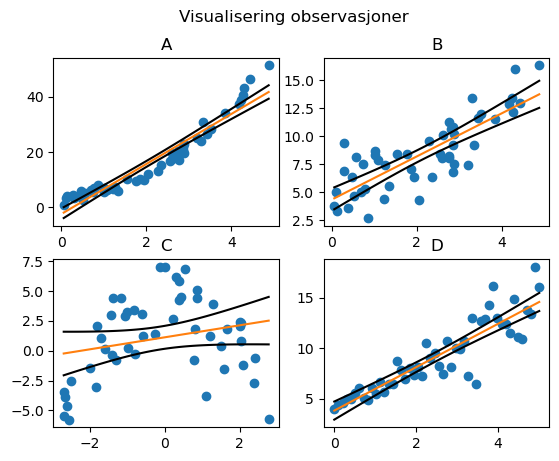

In [9]:
# Eksempel 3: Legg til 95% punktvis konfidensintervall
fig, axs = plt.subplots(2,2)
fig.suptitle('Visualisering observasjoner')
axs[0,0].plot(xA,yA, 'o')
xs = np.linspace(np.min(xA), np.max(xA), 100)
ys = aHatA+bHatA*xs
axs[0,0].plot(xs, ys)
s = np.sqrt(np.var(yA-aHatA-bHatA*xA, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarA)**2)/SxxA)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarA)**2)/SxxA)
axs[0,0].plot(xs, yUpper, '-k')
axs[0,0].plot(xs, yLower, '-k')
axs[0,0].set_title("A")

axs[0,1].plot(xB,yB, 'o')
xs = np.linspace(np.min(xB), np.max(xB), 100)
ys = aHatB+bHatB*xs
axs[0,1].plot(xs, ys)
s = np.sqrt(np.var(yB-aHatB-bHatB*xB, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarB)**2)/SxxB)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarB)**2)/SxxB)
axs[0,1].plot(xs, yUpper, '-k')
axs[0,1].plot(xs, yLower, '-k')
axs[0,1].set_title("B")

axs[1,0].plot(xC,yC, 'o')
xs = np.linspace(np.min(xC), np.max(xC), 100)
ys = aHatC+bHatC*xs
axs[1,0].plot(xs, ys)
s = np.sqrt(np.var(yC-aHatC-bHatC*xC, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarC)**2)/SxxC)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarC)**2)/SxxC)
axs[1,0].plot(xs, yUpper, '-k')
axs[1,0].plot(xs, yLower, '-k')
axs[1,0].set_title("C")

axs[1,1].plot(xD,yD, 'o')
xs = np.linspace(np.min(xD), np.max(xD), 100)
ys = aHatD+bHatD*xs
s = np.sqrt(np.var(yD-aHatD-bHatD*xD, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarD)**2)/SxxD)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarD)**2)/SxxD)
axs[1,1].plot(xs, yUpper, '-k')
axs[1,1].plot(xs, yLower, '-k')
axs[1,1].plot(xs, ys)
axs[1,1].set_title("D")

Text(0.5, 1.0, 'D')

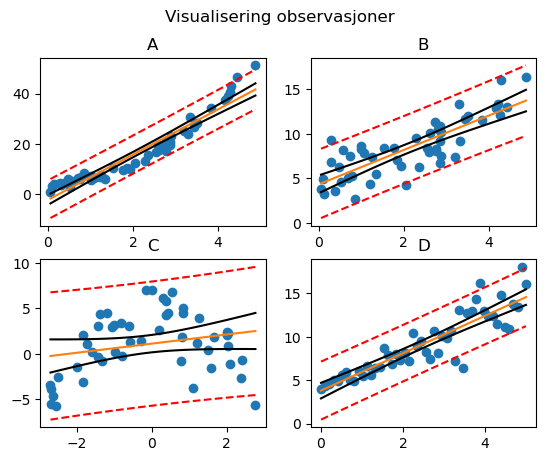

In [10]:
# Eksempel 4: Legg til 95% punktvis konfidensintervall 
fig, axs = plt.subplots(2,2)
fig.suptitle('Visualisering observasjoner')
axs[0,0].plot(xA,yA, 'o')
xs = np.linspace(np.min(xA), np.max(xA), 100)
ys = aHatA+bHatA*xs
axs[0,0].plot(xs, ys)
s = np.sqrt(np.var(yA-aHatA-bHatA*xA, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarA)**2)/SxxA)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarA)**2)/SxxA)
axs[0,0].plot(xs, yUpper, '-k')
axs[0,0].plot(xs, yLower, '-k')
yUpper = ys + tCrit*s*np.sqrt(1+1/nObs+((xs-xBarA)**2)/SxxA)
yLower = ys - tCrit*s*np.sqrt(1+1/nObs+((xs-xBarA)**2)/SxxA)
axs[0,0].plot(xs, yUpper, '--r')
axs[0,0].plot(xs, yLower, '--r')
axs[0,0].set_title("A")

axs[0,1].plot(xB,yB, 'o')
xs = np.linspace(np.min(xB), np.max(xB), 100)
ys = aHatB+bHatB*xs
axs[0,1].plot(xs, ys)
s = np.sqrt(np.var(yB-aHatB-bHatB*xB, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarB)**2)/SxxB)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarB)**2)/SxxB)
axs[0,1].plot(xs, yUpper, '-k')
axs[0,1].plot(xs, yLower, '-k')
yUpper = ys + tCrit*s*np.sqrt(1+1/nObs+((xs-xBarB)**2)/SxxB)
yLower = ys - tCrit*s*np.sqrt(1+1/nObs+((xs-xBarB)**2)/SxxB)
axs[0,1].plot(xs, yUpper, '--r')
axs[0,1].plot(xs, yLower, '--r')
axs[0,1].set_title("B")

axs[1,0].plot(xC,yC, 'o')
xs = np.linspace(np.min(xC), np.max(xC), 100)
ys = aHatC+bHatC*xs
axs[1,0].plot(xs, ys)
s = np.sqrt(np.var(yC-aHatC-bHatC*xC, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarC)**2)/SxxC)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarC)**2)/SxxC)
axs[1,0].plot(xs, yUpper, '-k')
axs[1,0].plot(xs, yLower, '-k')
yUpper = ys + tCrit*s*np.sqrt(1+1/nObs+((xs-xBarC)**2)/SxxC)
yLower = ys - tCrit*s*np.sqrt(1+1/nObs+((xs-xBarC)**2)/SxxC)
axs[1,0].plot(xs, yUpper, '--r')
axs[1,0].plot(xs, yLower, '--r')
axs[1,0].set_title("C")

axs[1,1].plot(xD,yD, 'o')
xs = np.linspace(np.min(xD), np.max(xD), 100)
ys = aHatD+bHatD*xs
s = np.sqrt(np.var(yD-aHatD-bHatD*xD, ddof = 2))
tCrit = stats.t.ppf(0.975, df = 48)
yUpper = ys + tCrit*s*np.sqrt(1/nObs+((xs-xBarD)**2)/SxxD)
yLower = ys - tCrit*s*np.sqrt(1/nObs+((xs-xBarD)**2)/SxxD)
axs[1,1].plot(xs, yUpper, '-k')
axs[1,1].plot(xs, yLower, '-k')
axs[1,1].plot(xs, ys)
yUpper = ys + tCrit*s*np.sqrt(1+1/nObs+((xs-xBarD)**2)/SxxD)
yLower = ys - tCrit*s*np.sqrt(1+1/nObs+((xs-xBarD)**2)/SxxD)
axs[1,1].plot(xs, yUpper, '--r')
axs[1,1].plot(xs, yLower, '--r')
axs[1,1].set_title("D")

In [17]:
# T-tester på stigningstall
sA = np.sqrt(np.var(yA-aHatA-bHatA*xA, ddof = 2))
tA = bHatA/sA*np.sqrt(SxxA)
pA = 2*stats.t.cdf(-np.abs(tA), df = nObs-2)
print("A: p-value = ", {pA:.3e}, sep = "")

sB = np.sqrt(np.var(yB-aHatB-bHatB*xB, ddof = 2))
tB = bHatB/sB*np.sqrt(SxxB)
pB = 2*stats.t.cdf(-np.abs(tB), df = nObs-2)
print("B: p-value = ", {pB:.3e}, sep = "")

sC = np.sqrt(np.var(yC-aHatC-bHatC*xC, ddof = 2))
tC = bHatC/sC*np.sqrt(SxxC)
pC = 2*stats.t.cdf(-np.abs(tC), df = nObs-2)
print("C: p-value = ", {pC:.3e}, sep = "")

sD = np.sqrt(np.var(yD-aHatD-bHatD*xD, ddof = 2))
tD = bHatD/sD*np.sqrt(SxxD)
pD = 2*stats.t.cdf(-np.abs(tD), df = nObs-2)
print("D: p-value = ", {pD:.3e}, sep = "")

SyntaxError: invalid decimal literal (2082468169.py, line 5)